# Binary Classification on Student Performance Dataset

Here, we will train __Logistic regression__ to predict if the students __pass__ or __fail__ given different features and also, evaluate the performance of the model.


### Dataset Information:

| Attribute    | Description                                                                                                                                       | Type     | Values/Range                                                 |
|--------------|---------------------------------------------------------------------------------------------------------------------------------------------------|----------|--------------------------------------------------------------|
| school       | Student's school                                                                                                                                  | Binary   | 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira           |
| sex          | Student's sex                                                                                                                                     | Binary   | 'F' - female, 'M' - male                                      |
| age          | Student's age                                                                                                                                     | Numeric  | 15 - 22                                                      |
| address      | Student's home address type                                                                                                                       | Binary   | 'U' - urban, 'R' - rural                                      |
| famsize      | Family size                                                                                                                                       | Binary   | 'LE3' - less or equal to 3, 'GT3' - greater than 3            |
| Pstatus      | Parent's cohabitation status                                                                                                                      | Binary   | 'T' - living together, 'A' - apart                            |
| Medu         | Mother's education                                                                                                                                | Numeric  | 0 - none, 1 - primary (4th grade), 2 - 5th to 9th grade, 3 - secondary, 4 - higher education |
| Fedu         | Father's education                                                                                                                                | Numeric  | 0 - none, 1 - primary (4th grade), 2 - 5th to 9th grade, 3 - secondary, 4 - higher education |
| Mjob         | Mother's job                                                                                                                                      | Nominal  | 'teacher', 'health', 'civil services', 'at_home', 'other'     |
| Fjob         | Father's job                                                                                                                                      | Nominal  | 'teacher', 'health', 'civil services', 'at_home', 'other'     |
| reason       | Reason to choose this school                                                                                                                      | Nominal  | 'home', 'reputation', 'course', 'other'                      |
| guardian     | Student's guardian                                                                                                                                | Nominal  | 'mother', 'father', 'other'                                  |
| traveltime   | Home to school travel time                                                                                                                        | Numeric  | 1 - <15 min, 2 - 15 to 30 min, 3 - 30 min to 1 hour, 4 - >1 hour |
| studytime    | Weekly study time                                                                                                                                 | Numeric  | 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, 4 - >10 hours |
| failures     | Number of past class failures                                                                                                                     | Numeric  | 0, 1, 2, 3, 4                                                |
| schoolsup    | Extra educational support                                                                                                                         | Binary   | 'yes', 'no'                                                  |
| famsup       | Family educational support                                                                                                                        | Binary   | 'yes', 'no'                                                  |
| paid         | Extra paid classes within the course subject                                                                                                      | Binary   | 'yes', 'no'                                                  |
| activities   | Extra-curricular activities                                                                                                                       | Binary   | 'yes', 'no'                                                  |
| nursery      | Attended nursery school                                                                                                                           | Binary   | 'yes', 'no'                                                  |
| higher       | Wants to take higher education                                                                                                                    | Binary   | 'yes', 'no'                                                  |
| internet     | Internet access at home                                                                                                                           | Binary   | 'yes', 'no'                                                  |
| romantic     | With a romantic relationship                                                                                                                      | Binary   | 'yes', 'no'                                                  |
| famrel       | Quality of family relationships                                                                                                                   | Numeric  | 1 - very bad to 5 - excellent                                |
| freetime     | Free time after school                                                                                                                            | Numeric  | 1 - very low to 5 - very high                                |
| goout        | Going out with friends                                                                                                                            | Numeric  | 1 - very low to 5 - very high                                |
| Dalc         | Workday alcohol consumption                                                                                                                       | Numeric  | 1 - very low to 5 - very high                                |
| Walc         | Weekend alcohol consumption                                                                                                                       | Numeric  | 1 - very low to 5 - very high                                |
| health       | Current health status                                                                                                                             | Numeric  | 1 - very bad to 5 - very good                                |
| absences     | Number of school absences                                                                                                                         | Numeric  | 0 to 93                                                      |
| G1           | First period grade                                                                                                                                | Numeric  | 0 to 20                                                      |
| G2           | Second period grade                                                                                                                               | Numeric  | 0 to 20                                                      |
| G3           | __Final grade__ (target)                                                                                                                              | Numeric  | 0 to 20                                                      |

</br>

> __Note:__ the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.




### 1. Downloading Datasets

In [1]:
# Install Kaggle to download datasets
!pip install kaggle

In [4]:
!kaggle datasets download larsen0966/student-performance-data-set
!unzip student-performance-data-set.zip 

Dataset URL: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set
License(s): CC0-1.0
student-performance-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  student-performance-data-set.zip


### 2. Reading Datasets

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Read the csv data
df = pd.read_csv("student-por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
# Checking null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
print("Shape of dataframe:", df.shape)

Shape of dataframe: (649, 33)


### 3. Assigning Data and Target

> - Assigning data and targets to $X$ and $y$ respectively where 
>   - X = all the features except target column $G3$ and 
>   - $y$ = Target column $G3$ 
> - Converting $y$ to a categorical variable
>   - $G3$ >= __pass marks (12)__ is labelled as __pass__ ($1$)
>   - $G3$ < __pass marks (12)__ is labelled as __fail__ ($0$)

In [9]:
def label(x):
    """ Function to return 1 if pass marks else 0 """
    return 1 if x>=12 else 0


X = df.drop(["G3"], axis=1)     # Passing all the features except target column G3
y = df["G3"].apply(label)       # Passing only target column G3

In [10]:
X.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,13


In [11]:
# Number of data points in each class
y.value_counts()

G3
1    348
0    301
Name: count, dtype: int64

### 4. Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=0
) 

len(y_train), len(y_test)

(519, 130)

### 5. Finding Correlations

Checking the correlation of all the numerical features with target $G3$ and extracting the top 5 features among the variable `top_five`


In [13]:
# Get correlation between features and target
correlation = X_train.select_dtypes("number").corrwith(y_train)

# List of top 5 features based on correlation with target variable
top_five = np.abs(correlation).sort_values(ascending=False).iloc[0:5].index

print("Correlation of all numerical val. with G3:\n", correlation)
print("\nTop five correlated features with G3:\n", top_five)

Correlation of all numerical val. with G3:
 age          -0.085498
Medu          0.281331
Fedu          0.209936
traveltime   -0.195928
studytime     0.212948
failures     -0.354200
famrel        0.106853
freetime     -0.119097
goout        -0.096563
Dalc         -0.219918
Walc         -0.179685
health       -0.063739
absences     -0.164542
G1            0.737308
G2            0.754858
dtype: float64

Top five correlated features with G3:
 Index(['G2', 'G1', 'failures', 'Medu', 'Dalc'], dtype='object')


### 6. Fit Logistic Regression Model on `top_five` features

In [14]:
from sklearn.linear_model import LogisticRegression

# Get filtered X_train of top 5 features 
X_train_top5_feat = X_train[correlation[top_five].index]

# Instantiate Logistic Regression and fit on the train dataset 
log_reg_top5 = LogisticRegression(fit_intercept=True)
log_reg_top5.fit(X_train_top5_feat, y_train)

# Get the required value of coeff. and intercept
theta = log_reg_top5.coef_
intercept = log_reg_top5.intercept_

print(f"Value of Theta: {theta} and\nIntercept {intercept}")

Value of Theta: [[ 2.58190734  0.41974068 -0.51997828  0.02719795 -0.09410816]] and
Intercept [-33.46122684]


### 7. Model Prediction

In [15]:
# Display filtered X_test of top 5 features 
X_test[top_five].head()

,G2,G1,failures,Medu,Dalc
532,7,9,0,2,1
375,14,14,0,0,2
306,16,15,0,3,3
625,10,10,0,2,1
480,9,9,1,2,1


In [16]:
y_test.head()

532    0
375    1
306    1
625    0
480    0
Name: G3, dtype: int64

In [17]:
# Get filtered X_test of top 5 features
X_test_top_five = X_test[correlation[top_five].index]

# Predict along filtered X_test of top 5 features
y_pred = log_reg_top5.predict(X_test_top_five)

# Display prediction of 5 X_test
y_pred[:5]  

array([0, 1, 1, 0, 0])

### 8. Model Evaulation

Lets check hows our model is performing using `accuracy` as an evaluation metric which gives the ratio of correctly classified points to the total number of points.

### Accuracy

**Definition**: Accuracy measures the overall correctness of the model by evaluating the proportion of correctly classified instances out of the total instances. It answers the question: "What proportion of total instances were correctly classified by the model?"

$$\text{Accuracy} = \frac{\text{True Positives (TP)} + \text{True Negatives (TN)}}{\text{True Positives (TP)} + \text{True Negatives (TN)} + \text{False Positives (FP)} + \text{False Negatives (FN)}}$$


In [18]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Log Reg. Model with top 5 features:", round(accuracy, 3))

Accuracy of Log Reg. Model with top 5 features: 0.892


> Though the dataset here is balanced dataset that maynot be always the case. In case of imbalanced dataset there are other metrics such as __recall__, __precision__, __F1-Score__ for better evaluation of the model. And, such metrics can be visualized using __confusion matrix__.

### Precision

**Definition**: Precision measures the accuracy of the positive predictions made by the model. It answers the question: "Of all the instances classified as positive, how many are actually positive?"

$$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}$$

- **True Positives (TP)**: Correctly predicted positive cases.
- **False Positives (FP)**: Cases incorrectly predicted as positive.

**Interpretation**: High precision means that when the model predicts positive, it is often correct. Precision is particularly important when the cost of false positives is high.

### Recall (Sensitivity)

**Definition**: Recall measures the model's ability to identify all relevant positive instances. It answers the question: "Of all the actual positive instances, how many did the model correctly identify?"

$$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}$$

- **False Negatives (FN)**: Cases incorrectly predicted as negative.

**Interpretation**: High recall means that the model successfully identifies most of the positive cases. Recall is particularly important when the cost of false negatives is high.

### F1-Score

**Definition**: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. It is useful when you need to take both false positives and false negatives into account.

$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

**Interpretation**: The F1-score is particularly useful when dealing with imbalanced datasets where one class is more important than the other. It helps to balance the trade-offs between precision and recall.


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtaining Truth negative, False positive, False negative, Truth positive
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Positive:", tp)
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)

True Positive: 66
True Negative: 50
False Positive: 3
False Negative: 11


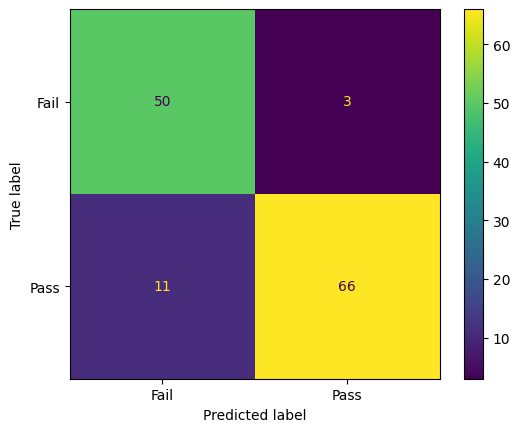

In [20]:
# Assign Class_names
class_names = ["Fail", "Pass"]

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg_top5, 
                                      X_test[top_five], 
                                      y_test, 
                                      display_labels=class_names
);

### 9. Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_score(y_test, y_pred):
    """ Compute evaluation metrics """
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1Score = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1Score

# Calculate all evaluation metrics
accuracy, precision, recall, f1Score = calculate_score(y_test, y_pred)

print("Test Accuracy with top 5 features:", round(accuracy, 3))
print("Test Precision Score with top 5 features:", round(precision, 3))
print("Test Recall Score with top 5 features:", round(recall, 3))
print("Test F1 Score with top 5 features:", round(f1Score, 3))

Test Accuracy with top 5 features: 0.892
Test Precision Score with top 5 features: 0.957
Test Recall Score with top 5 features: 0.857
Test F1 Score with top 5 features: 0.904


### 10. Variable Encoding

Machine learning algorithms cannot understand categorical straings such as student's sex (Male '$M$' or Female '$F$') unlesss we convert them to numerical values 0:'$F$' and 1:'$M$'. We can do this using __Label Encoding__.

__Label Encoding__ assigns a value from 1 through N for each category for the feature, here we are assuming there are N categories. 

Example: Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) has already been encoded numerically.

Label Encoder assumes that there is some order in the data, i.e., value 2 is greater than value 1, which is good if the data is ordinal but it is not suitable for nominal data types without any inherent order, such as mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g., administrative or police), 'at_home' or 'other'), in such cases we need to perform some other encoding method, such as one-hot Encoding

__One-hot Encoding__ maps each category to a vector that contains 1 and 0 denoting the presence or absence of the feature. Hence, this method will create multiple columns based on the features' cardinality, i.e., the number of categories in the feature. For: e.g.: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g., administrative or police), 'at_home' or 'other') has four different categories. Hence four columns will be created.

More about different [__types of encoding__](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02).


In [22]:
# List all numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()
numeric_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [23]:
numeric_columns = [col for col in numeric_columns if col != "G3"]
numeric_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

In [24]:
# Get binary (categorical) columns
binary_columns = [col for col in df.columns if df[col].nunique() == 2]
binary_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [25]:
# Get nominal (categorical) columns
nominal_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
nominal_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [26]:
# Include only those nominal categories which are not listed in binary categories
nominal_columns_binary_excluded = list(set(nominal_columns) - set(binary_columns))
nominal_columns_binary_excluded

['Mjob', 'reason', 'guardian', 'Fjob']

In [27]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
34,GP,M,16,U,GT3,T,3,2,other,other,...,no,5,4,3,1,1,5,4,12,12
432,MS,F,17,R,GT3,T,1,1,other,other,...,no,5,4,4,2,2,5,0,6,6
399,GP,F,18,U,GT3,T,3,2,other,services,...,yes,5,4,3,2,3,1,4,14,16
346,GP,M,17,U,LE3,T,4,4,other,teacher,...,no,4,1,1,2,2,5,0,12,13
542,MS,F,16,U,GT3,T,4,4,teacher,services,...,yes,5,3,5,1,4,5,1,10,11


In [28]:
from sklearn.preprocessing import LabelEncoder

def preprocess(df, binary, nominal):
    """ Label Encoding """
    df[binary] = df[binary].apply(LabelEncoder().fit_transform)
    df = pd.get_dummies(df, columns=nominal, prefix=nominal)
    return df

X_train = preprocess(X_train, binary_columns, nominal_columns_binary_excluded)
X_test = preprocess(X_test, binary_columns, nominal_columns_binary_excluded)

X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
34,0,1,16,1,0,1,3,2,1,1,...,False,False,False,True,False,False,False,True,False,False
432,1,0,17,0,0,1,1,1,1,1,...,True,False,True,False,False,False,False,True,False,False
399,0,0,18,1,0,1,3,2,1,3,...,True,False,False,True,False,False,False,False,True,False
346,0,1,17,1,1,1,4,4,2,1,...,False,False,True,False,False,False,False,False,False,True
542,1,0,16,1,0,1,4,4,2,3,...,False,False,False,True,False,False,False,False,True,False


### 11. Fit Logistic Regression model on all Features

*Note: Using `liblinear` as the solver in Logistic Regression*

[Logistic Regression Solvers](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [31]:
logistic_reg_all = LogisticRegression(fit_intercept=True, solver='liblinear')
logistic_reg_all.fit(X_train, y_train)

theta_all = logistic_reg_all.coef_
intercept_all = logistic_reg_all.intercept_

print(f"Using all features the value of Theta: \n{theta_all} \nand Intercept: \n{intercept_all}")

Using all features the value of Theta: 
[[ 0.06639358 -0.88469843 -0.66561473 -0.11978836 -0.34751782 -0.58558346
  -0.04553309 -0.19163718 -0.17619204  0.05381542 -0.60930293 -0.71911178
  -0.46621435  0.26487987  0.78603115 -0.41843889 -0.21876209 -0.18446289
   0.09890386 -0.11204598 -0.40772321  0.05724029 -0.32683498  0.03882063
  -0.11640695 -0.09472892  0.15930141  1.72530613 -1.61061528 -0.28290876
  -0.57974764  0.03658824  0.34912239 -0.35373505 -0.10469272 -0.86127139
  -0.76786189 -1.22534246 -1.26015342  0.39793483 -0.2993963  -0.43977161
  -0.50069231 -0.98418053  0.13647969]] 
and Intercept: 
[-2.08756105]


### 12. Model Prediction and Evaluation

In [32]:
y_pred_all = logistic_reg_all.predict(X_test)

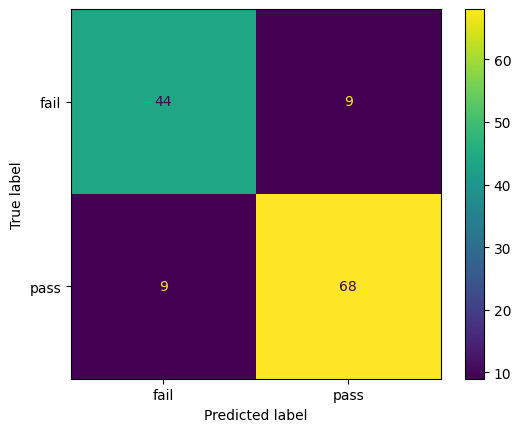

In [34]:
# Plot Confusion Matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names =['fail', 'pass']
ConfusionMatrixDisplay.from_estimator(logistic_reg_all, X_test, y_test, display_labels=class_names);

In [36]:
# Print Number of True Positive, True Negative, False Positive and False Negative.
tn_all, fp_all, fn_all, tp_all = confusion_matrix(y_test, y_pred_all).ravel()

print("True Positive:", tp_all)
print("True Negative:", tn_all)
print("False Positive:", fp_all)
print("False Negative:", fn_all)

True Positive: 68
True Negative: 44
False Positive: 9
False Negative: 9


In [41]:
accuracy_all, precision_all, recall_all, f1Score_all = calculate_score(y_test, y_pred_all)

print("Test Accuracy using all features", round(accuracy_all, 3))
print("Test Precision score using all features", round(precision_all, 3))
print("Test Recall score using all features", round(recall_all, 3))
print("Test F1 score using all features", round(f1Score_all, 3))

Test Accuracy using all features 0.862
Test Precision score using all features 0.883
Test Recall score using all features 0.883
Test F1 score using all features 0.883


### 13. Comparision between Results of Top 5 Features and All Features

<center>

| Metric                   | Top 5 Features | All Features |
|--------------------------|----------------|--------------|
| Test Accuracy            | 0.892          | 0.862        |
| Test Precision Score      | 0.957          | 0.883        |
| Test Recall Score         | 0.857          | 0.883        |
| Test F1 Score             | 0.904          | 0.883        |

</center>


### 14. How good are these values?

One way to ensure we have good accuracy, the F1 score is to check using a baseline model. A baseline model is the one that predicts simply with some pre-defined rules.

Check documentation here [Baseline Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

base_model = DummyClassifier(strategy='most_frequent')
base_model.fit(X_train, y_train)

y_pred_all = base_model.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_all)
f1score_base = f1_score(y_test, y_pred_all)

print("Test Accuracy with top 5 features", round(accuracy, 3))
print("Test F1 Score with top 5 features", round(f1Score, 3))
print("-"*40)
print("Test Accuracy with Dummy Classifier", round(accuracy_base, 3))
print("Test F1 Score with Dummy Classifier",round(f1score_base, 3))

Test Accuracy with top 5 features 0.892
Test F1 Score with top 5 features 0.904
----------------------------------------
Test Accuracy with Dummy Classifier 0.592
Test F1 Score with Dummy Classifier 0.744


> We can see here, our model is performing better than the baseline model.

## Using Model for Prediciton

In [55]:
X_train[['G2', 'G1', 'failures', 'Medu', 'Dalc']].sample(5)

,G2,G1,failures,Medu,Dalc
481,10,9,0,2,1
191,9,11,0,3,1
332,18,18,0,2,1
560,9,10,0,1,1
381,14,15,0,4,1


In [54]:
# Sample data for the top 5 features with correct feature names
pred_sample = [[10, 8, 1, 22, 5]]
feature_names = ['G2', 'G1', 'failures', 'Medu', 'Dalc']
# Converting into DataFrame
prediction_df = pd.DataFrame(pred_sample, columns=feature_names)

# Predict the class.
pred = log_reg_top5.predict(prediction_df)

# Predict the probability.
pred_proba = log_reg_top5.predict_proba(prediction_df)
max_1 = pred_proba.max()
max_1 = round(max_1, 2)

if pred == 0:
    print("Fail With {}% probability.".format(max_1*100))
else:
    print("Pass with {}% probability.".format(max_1*100))

Fail With 99.0% probability.
